In [ ]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
import random as rd
from sympy.utilities.iterables import multiset_permutations
import sympy 

In [ ]:
def f(x):
  aux=B.dot(x)
  return np.max(aux)-np.min(aux[aux!=0])

In [ ]:
def orden(i,j,N):
  t=0;
  for s in range(N):
    for k in range(N):
      if s==i and k==j:
        return t
      else:
        t+=1
  return 0
  
def condicionada(i,j,mu,M):
  prob=0
  n=len(mu)
  t=0
  for h in range(n):
    if M[orden(i,j,N)][t]==1:
      prob+=mu[t]
    else:
      M=np.delete(M,int(t),1)
      mu=np.delete(mu,int(t),0)
      t=t-1
      #print(len(mu))
    t+=1
  for t in range(len(mu)):
    mu[t]=mu[t]/prob
  return mu,M

In [ ]:
N=8
#val=np.array([[0,1,1,1,1,1,1,0],[1,0,1,1,1,1,1,0],[1,1,0,1,1,1,1,1],[1,0,1,0,1,0,1,1],[1,1,1,1,0,1,1,1],[1,1,1,1,1,0,1,0],[0,1,1,1,1,1,0,1],[1,1,1,0,1,1,1,0]])
#val=np.array([[0, 1,1],[1,0,1],[1,1,1]])

#Año 2021
val=np.array([[0,0,1,1,1,1,1,0],[0,0,1,1,0,1,1,1],[1,1,0,1,1,1,1,1],[1,1,1,0,1,1,1,1],[1,1,1,1,0,1,1,1],[1,0,1,1,1,0,1,0],[1,1,1,1,1,0,0,1],[1,1,1,1,1,1,1,0]])

A_aux=np.zeros(N)
#2022
#B=np.zeros((N*N,4781))
#2021
B=np.zeros((N*N,4572))
B=np.zeros((N*N,4572))
N_posib=0
a = np.array([1,2,3,4,5,6,7,8])
#a = np.array([1,2,3])
for p in multiset_permutations(a):
  sirve=1
  for i in range(N):
    if val[p[i]-1,i]!=1:
      sirve=0
  if sirve:
    for i in range(N):
      B[(p[i]-1)*N+i,N_posib]=1
    N_posib=N_posib+1
N_posib

4572

In [ ]:
val

array([[0, 0, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 0, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1],
       [1, 0, 1, 1, 1, 0, 1, 0],
       [1, 1, 1, 1, 1, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 0]])

In [ ]:
#tam_mu=4781
tam_mu=4572
sol=np.ones(tam_mu)/tam_mu
it_max=100000000
tol=0.1
eps=1
it=0
change=0.000001
P_acep=0.005

while it<it_max and eps>tol:
  it=it+1
  x=rd.randint(0,tam_mu-1)
  y=rd.randint(0,tam_mu-1)
  if x!=y:
    posible_sol=np.copy(sol)
    posible_sol[x]=posible_sol[x]+change
    posible_sol[y]=posible_sol[y]-change
    if posible_sol[x]>0 and posible_sol[y]>0:
      if f(posible_sol)<=f(sol):
        sol[x]=posible_sol[x]
        sol[y]=posible_sol[y]
      elif rd.random()<P_acep:
        sol[x]=posible_sol[x]
        sol[y]=posible_sol[y]
      eps=f(sol)


KeyboardInterrupt: ignored

In [ ]:

f(sol)

0.11249800962379701

In [ ]:
aux=B.dot(sol)
np.size(aux[aux==0])

15

In [ ]:
vec_P=np.matmul(B,sol)
count=0
P=np.zeros((8,8))
for i in range(N):
  for j in range(N):
      P[i,j]=vec_P[count]
      count=count+1
np.size(P[P==0])

15

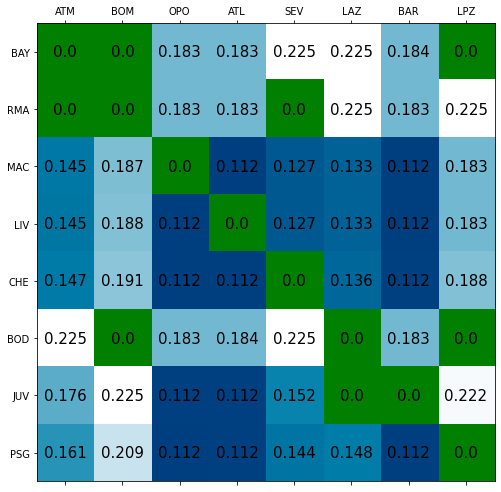

In [ ]:
plt.rcParams["figure.figsize"] = [7, 7]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
ax.matshow(P, cmap='ocean')

for i in range(N):
   for j in range(N):
      c = round(P[j, i],3)
      ax.text(i, j, str(c), va='center', ha='center',size=15)
 
ax.xaxis.set_ticklabels(['','ATM','BOM','OPO','ATL','SEV','LAZ','BAR','LPZ']); ax.yaxis.set_ticklabels(['','BAY','RMA','MAC','LIV','CHE','BOD','JUV','PSG']);
plt.show()
fig.savefig("Estocast_max_2020.pdf")

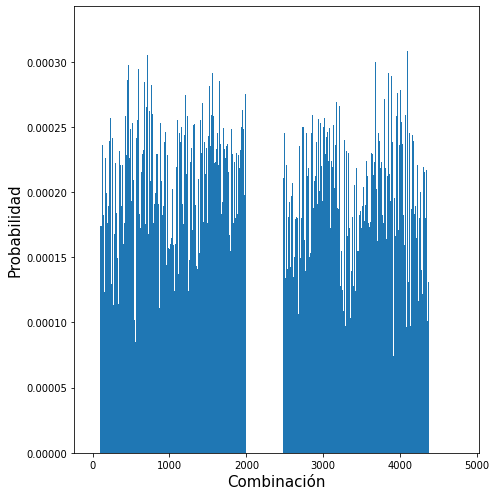

In [ ]:
fig, ax = plt.subplots()
plt.bar(np.linspace(0,4781,4781),sol)
ax.set_xlabel('Combinación',size=15);ax.set_ylabel('Probabilidad',size=15); 
#fig.savefig("Densidad_prob_max.pdf")
plt.show()

In [ ]:
Bb=np.c_[B,vec_P]
np.linalg.matrix_rank(Bb)

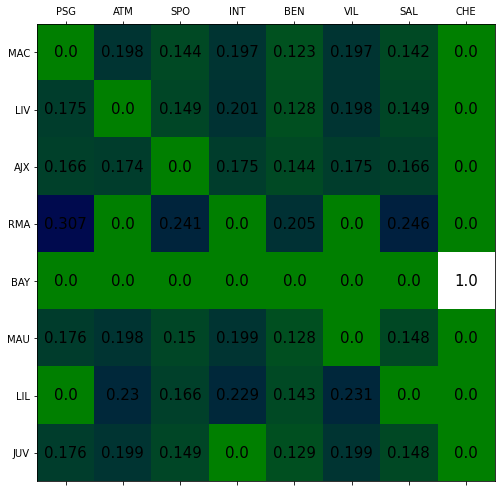

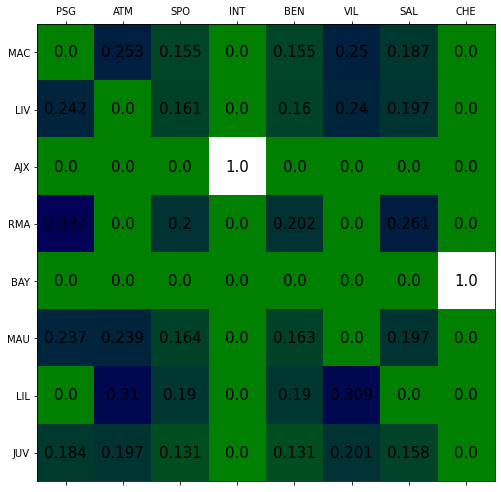

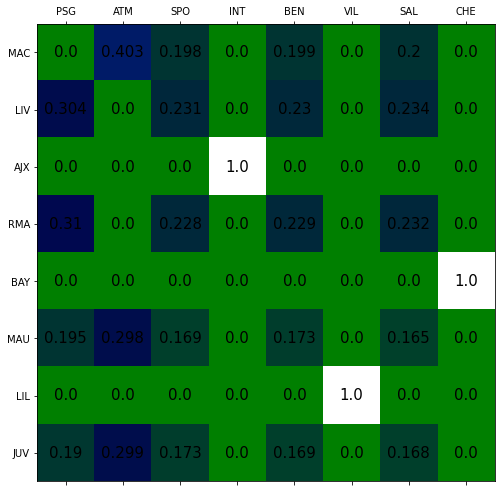

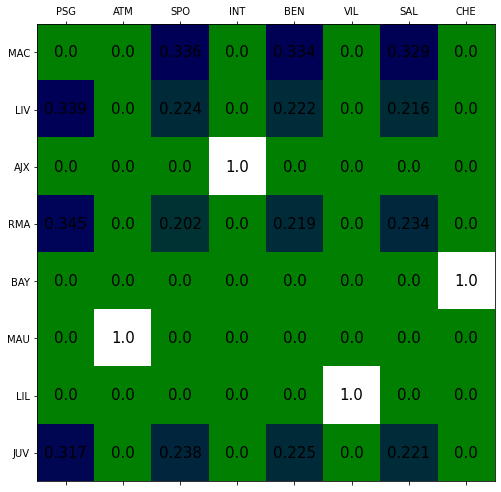

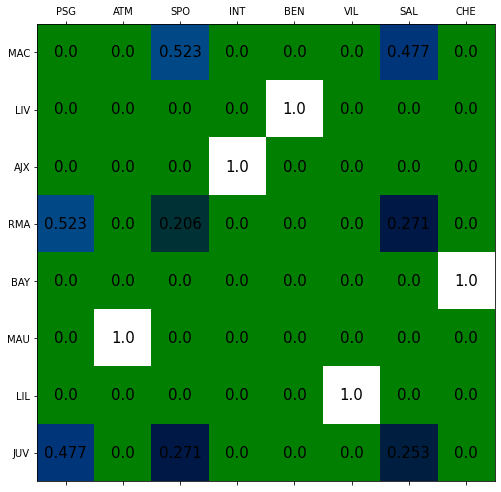

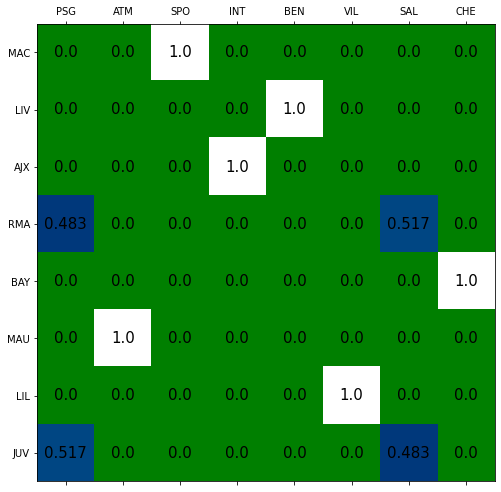

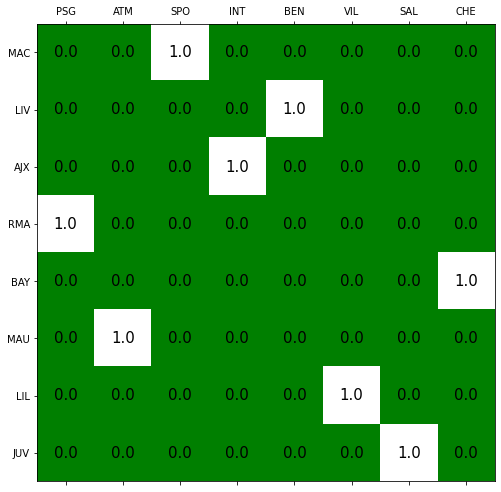

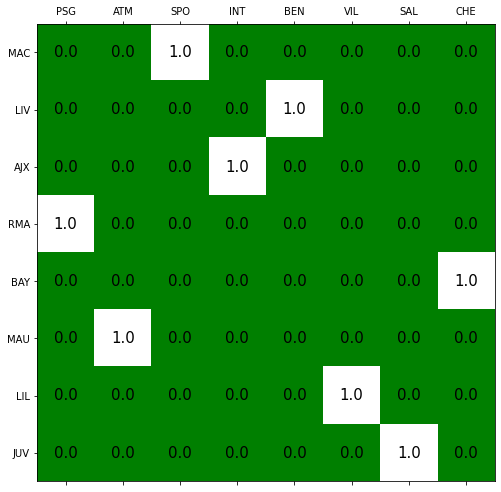

In [ ]:
P_new=P
it_max=1
mu=sol
final=np.zeros((N,N))
primeros=np.arange(N)
v_norma=[]
for it in range(it_max):
  B_new=B
  mu=sol
  v_elegidos=np.random.permutation(primeros)
  contador=0
  for elegido in v_elegidos:
    contador+=1
    aleatorio=rd.random()
    vect_P_cond=P_new[elegido,:]
    #vect_P_cond.remove(0)
    f_distr_cond=np.cumsum(vect_P_cond)
    pos_contr=0
    fin=0
    for ind_dis in range(len(f_distr_cond)):
      if f_distr_cond[ind_dis]>=aleatorio or fin==1:
        fin=1
      else:
        pos_contr+=1
    contrincante=primeros[pos_contr]
    #print(elegido,contrincante)
    final[elegido,contrincante]+=1
    mu_aux,B_aux=condicionada(elegido,contrincante,mu,B_new)
    mu=np.copy(mu_aux)
    B_new=np.copy(B_aux)
    vec_P=B_new.dot(mu)
    count=0
    P_new=np.zeros((8,8))
    for i in range(N):
      for j in range(N):
          P_new[i,j]=vec_P[count]
          count=count+1
    fig, ax = plt.subplots()
    ax.matshow(P_new, cmap='ocean')

    for i in range(N):
      for j in range(N):
          c = round(P_new[j, i],3)
          ax.text(i, j, str(c), va='center', ha='center',size=15)
    
    ax.xaxis.set_ticklabels(['','PSG','ATM','SPO','INT','BEN','VIL','SAL','CHE']); ax.yaxis.set_ticklabels(['','MAC','LIV','AJX','RMA', 'BAY','MAU','LIL','JUV']);
    plt.show()
    fig.savefig("Sorteo_paso"+str(contador)+".pdf")
  v_norma.append(np.linalg.norm(P-final/(it+1)))
  plt.rcParams["figure.figsize"] = [7, 7]
  plt.rcParams["figure.autolayout"] = True

  
      


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
P_sim=final/(it+1)
plt.rcParams["figure.figsize"] = [7, 7]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
ax.matshow(P_sim, cmap='ocean')

for i in range(N):
   for j in range(N):
      c = round(P_sim[j, i],3)
      ax.text(i, j, str(c), va='center', ha='center',size=15)
 
ax.xaxis.set_ticklabels(['','PSG','ATM','SPO','INT','BEN','VIL','SAL','CHE']); ax.yaxis.set_ticklabels(['','JUV','LIL','MAU','BAY','RMA','AJX','LIV','MAC']);
plt.show()
fig.savefig("Simulacion_metodo_max.pdf")
fig.savefig("Sorteo_paso.pdf"+str(i))

In [ ]:
a=np.arange(5)
v=np.array([0.1,0.3,0.5,0.9,1])
aleatorio=rd.random()
print(aleatorio)
aux=np.where(v<aleatorio)[0]
a[aux]


In [ ]:
fig, ax = plt.subplots()
plt.plot(v_norma)
ax.set_xlabel('Iteración',size=15);ax.set_ylabel('$||P-P_{sim}||$',size=15); 
fig.savefig("converg_lin.pdf")
plt.show()

In [ ]:
P_sim-P

In [ ]:
np.max(P_sim)-np.min(P_sim[P_sim!=0])

In [ ]:
v_norma_antiguo=v_norma
print(v_norma_antiguo)

In [ ]:
val=np.ones((N,N))
prohibida=[[0,1]]
val[prohibida[0]]

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])